In [120]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import RidgeCV
from dense_nn_class import DLN_Network
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV


estimators = [
    ("ada", AdaBoostRegressor()),
    ("gbr", GradientBoostingRegressor()),
    ("cat", CatBoostRegressor()),
    ("lasso", LassoCV())
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(),
    cv=10,
    verbose=1,
    passthrough=True,
)

In [122]:
%store -r dm 
dm = dm 

In [131]:
from sklearn.model_selection import train_test_split 

X = dm.data.iloc[:, 2:-2]
y = dm.data.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X.columns)]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_submission.shape)

X

(60894, 47) (60894,) (20299, 47) (20299,) (2160, 47)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,...,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,month,hours,week_number,day_year,sum_rad:W
0,7.700,1.22825,0.000000,0.000,0.0,280.299988,0.000,0.000000,0.000,0.000000,...,40386.476562,3.600,-3.575,-0.500,0.0,12.0,1.607695,49.021857,341.969796,0.000000
1,7.700,1.22350,0.000000,0.000,0.0,280.299988,0.000,0.000000,0.000,0.000000,...,33770.648438,3.350,-3.350,0.275,0.0,12.0,0.408890,49.021857,341.969796,0.000000
2,7.875,1.21975,0.000000,0.000,0.0,280.649994,0.000,0.000000,0.000,0.000000,...,13595.500000,3.050,-2.950,0.750,0.0,12.0,0.000000,50.310422,343.473765,0.000000
3,8.425,1.21800,208.649994,0.750,0.0,281.674988,0.300,526.775024,0.000,0.000000,...,2321.850098,2.725,-2.600,0.875,0.0,12.0,0.408890,50.310422,343.473765,0.350000
4,8.950,1.21800,32468.150391,23.100,0.0,282.500000,11.975,22068.949219,0.150,282.975006,...,11634.799805,2.550,-2.350,0.925,0.0,12.0,1.607695,50.310422,343.473765,11.741668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81188,4.500,1.27300,363164.968750,52.750,0.0,272.225006,27.650,184211.218750,5.525,96581.000000,...,22930.099609,4.450,4.150,1.675,0.0,9.0,12.000000,38.082802,269.178571,28.641668
81189,4.400,1.27550,84010.148438,4.175,0.0,272.024994,2.775,54774.000000,0.000,9934.575195,...,25028.000000,4.075,3.600,1.875,0.0,9.0,8.894171,38.082802,269.178571,2.316667
81190,4.400,1.27850,2206.800049,0.000,0.0,271.950012,0.000,4984.049805,0.000,0.000000,...,23995.599609,3.600,2.950,2.125,0.0,9.0,6.000000,38.082802,269.178571,0.000000
81191,4.400,1.27900,0.000000,0.000,0.0,271.899994,0.000,0.000000,0.000,0.000000,...,23068.599609,3.600,2.625,2.400,0.0,9.0,3.514719,38.082802,269.178571,0.000000


In [132]:

reg.fit(X, y)
    


Learning rate set to 0.082013
0:	learn: 759.8357712	total: 7.88ms	remaining: 7.87s
1:	learn: 711.5862813	total: 15.2ms	remaining: 7.58s
2:	learn: 667.3724890	total: 21.2ms	remaining: 7.04s
3:	learn: 627.1778138	total: 27.5ms	remaining: 6.84s
4:	learn: 590.9846111	total: 33.5ms	remaining: 6.67s
5:	learn: 558.4071329	total: 39.7ms	remaining: 6.57s
6:	learn: 529.5167907	total: 45.8ms	remaining: 6.5s
7:	learn: 502.6463673	total: 53ms	remaining: 6.58s
8:	learn: 478.9711434	total: 59.6ms	remaining: 6.56s
9:	learn: 458.2409931	total: 65.4ms	remaining: 6.48s
10:	learn: 439.2039202	total: 71.1ms	remaining: 6.39s
11:	learn: 422.2584615	total: 79.7ms	remaining: 6.56s
12:	learn: 407.4872000	total: 87ms	remaining: 6.6s
13:	learn: 394.2915451	total: 94.3ms	remaining: 6.64s
14:	learn: 382.5069566	total: 102ms	remaining: 6.67s
15:	learn: 372.3198182	total: 108ms	remaining: 6.66s
16:	learn: 362.8764022	total: 115ms	remaining: 6.65s
17:	learn: 354.7148211	total: 121ms	remaining: 6.61s
18:	learn: 347.366

StackingRegressor(cv=10,
                  estimators=[('ada', AdaBoostRegressor()),
                              ('gbr', GradientBoostingRegressor()),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x326314310>),
                              ('lasso', LassoCV())],
                  final_estimator=RandomForestRegressor(), passthrough=True,
                  verbose=1)

In [133]:
## Specify the model to be used
import numpy as np
import pandas as pd

pred = reg.predict(X_submission)

pred = pd.DataFrame(pred.reshape((3*720,)))


#pred[pred<0] = 0

# NAME THE FILE 
pred.to_csv("stack_4.csv")

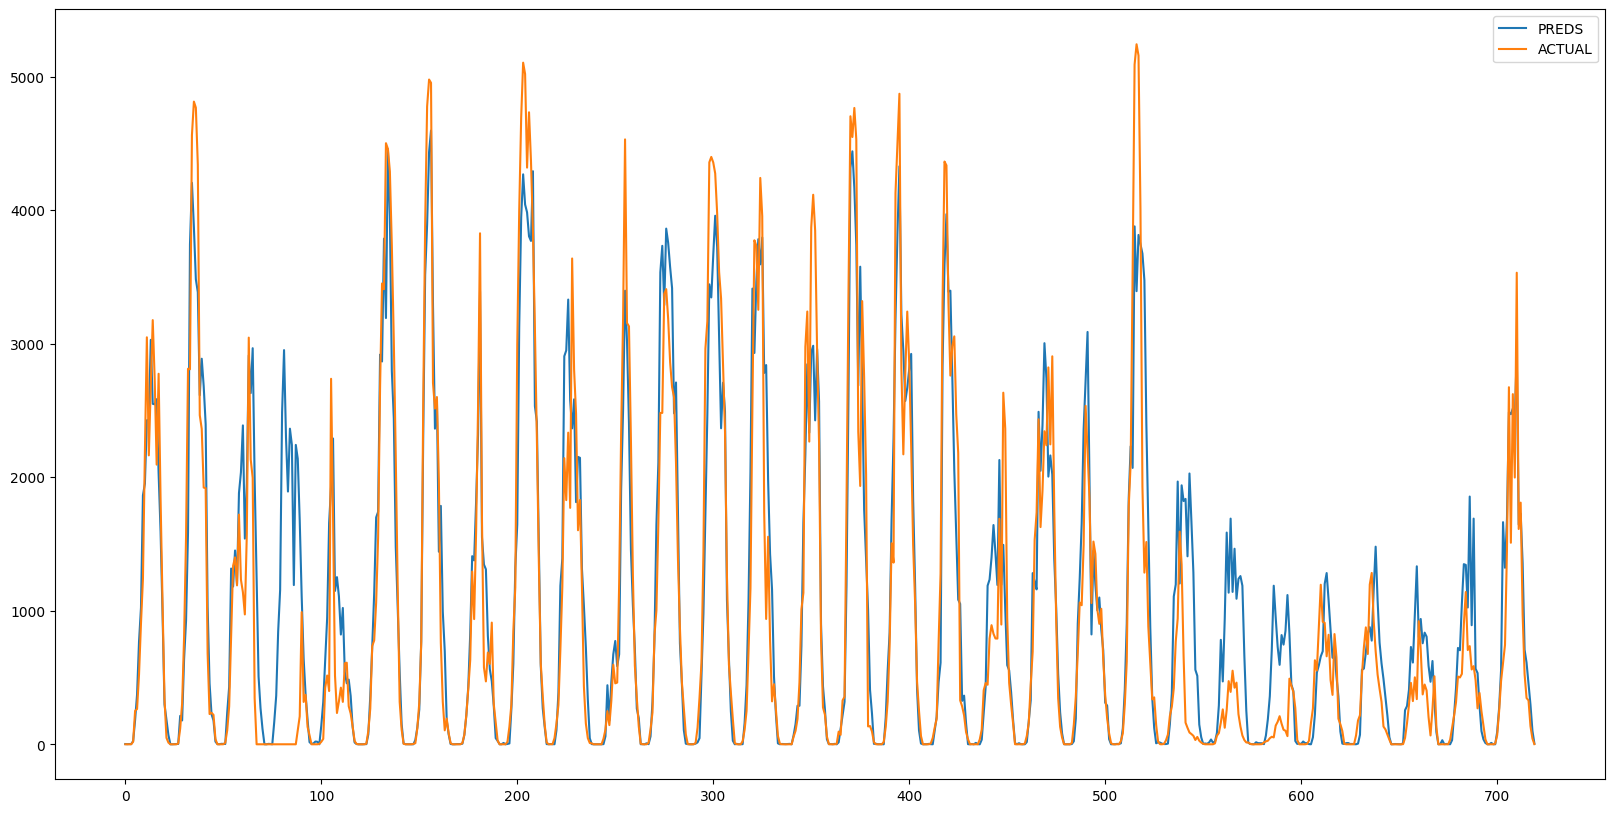

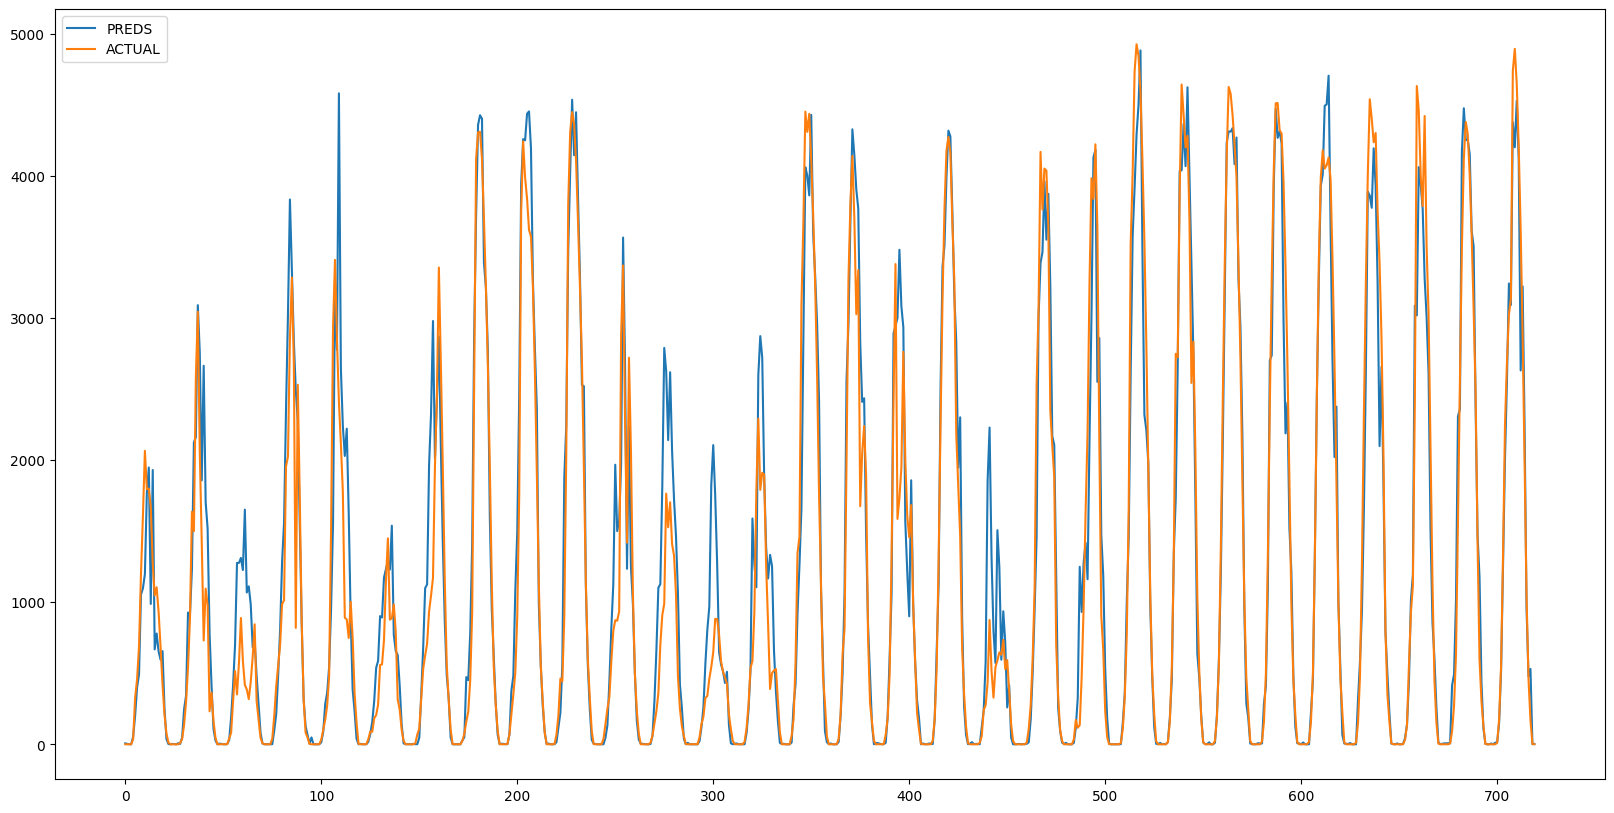

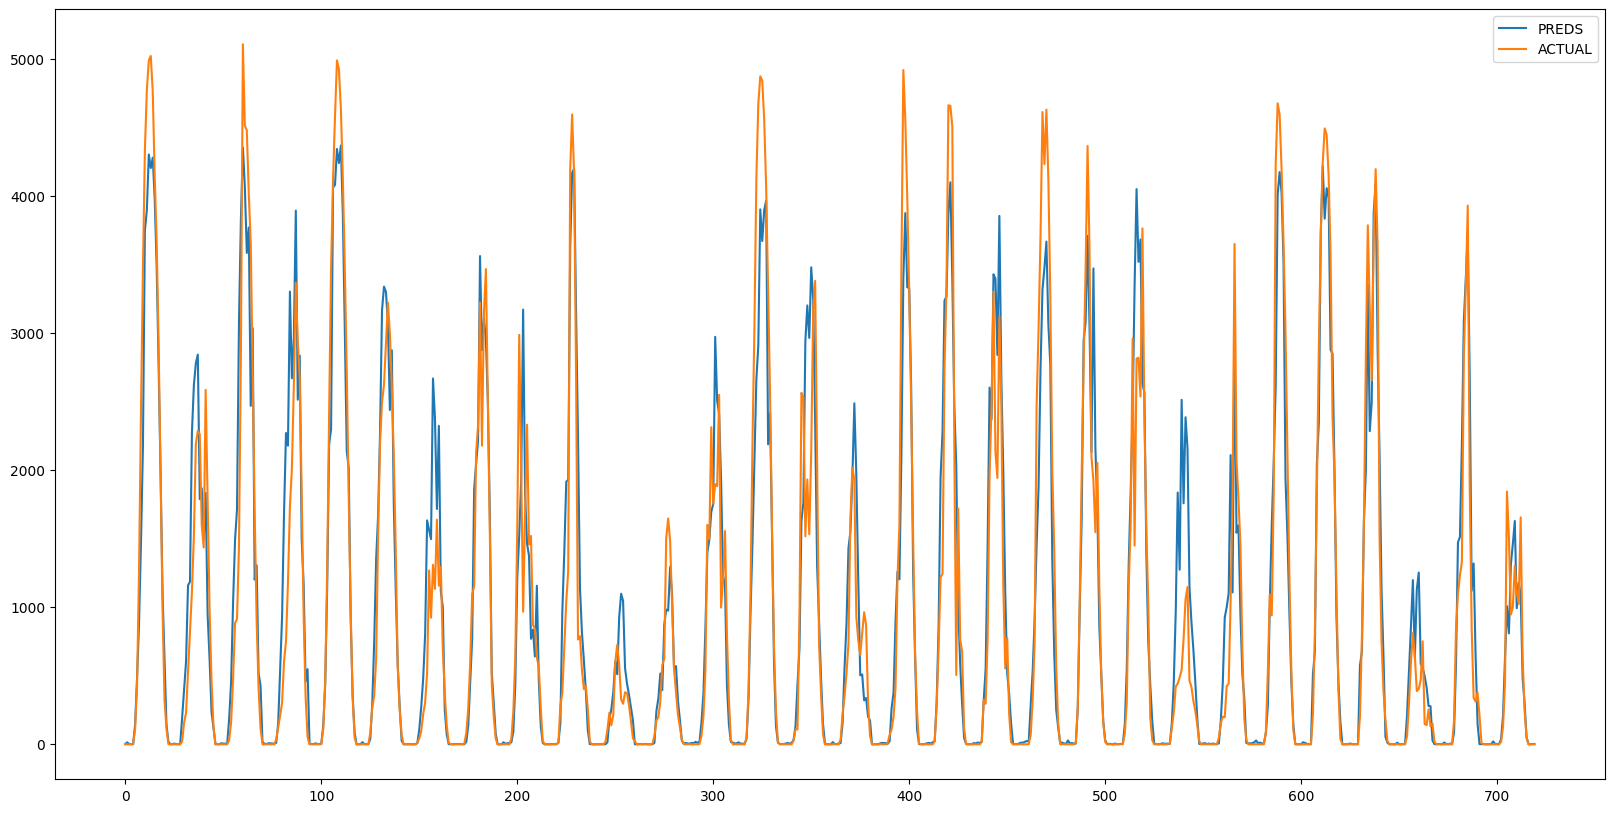

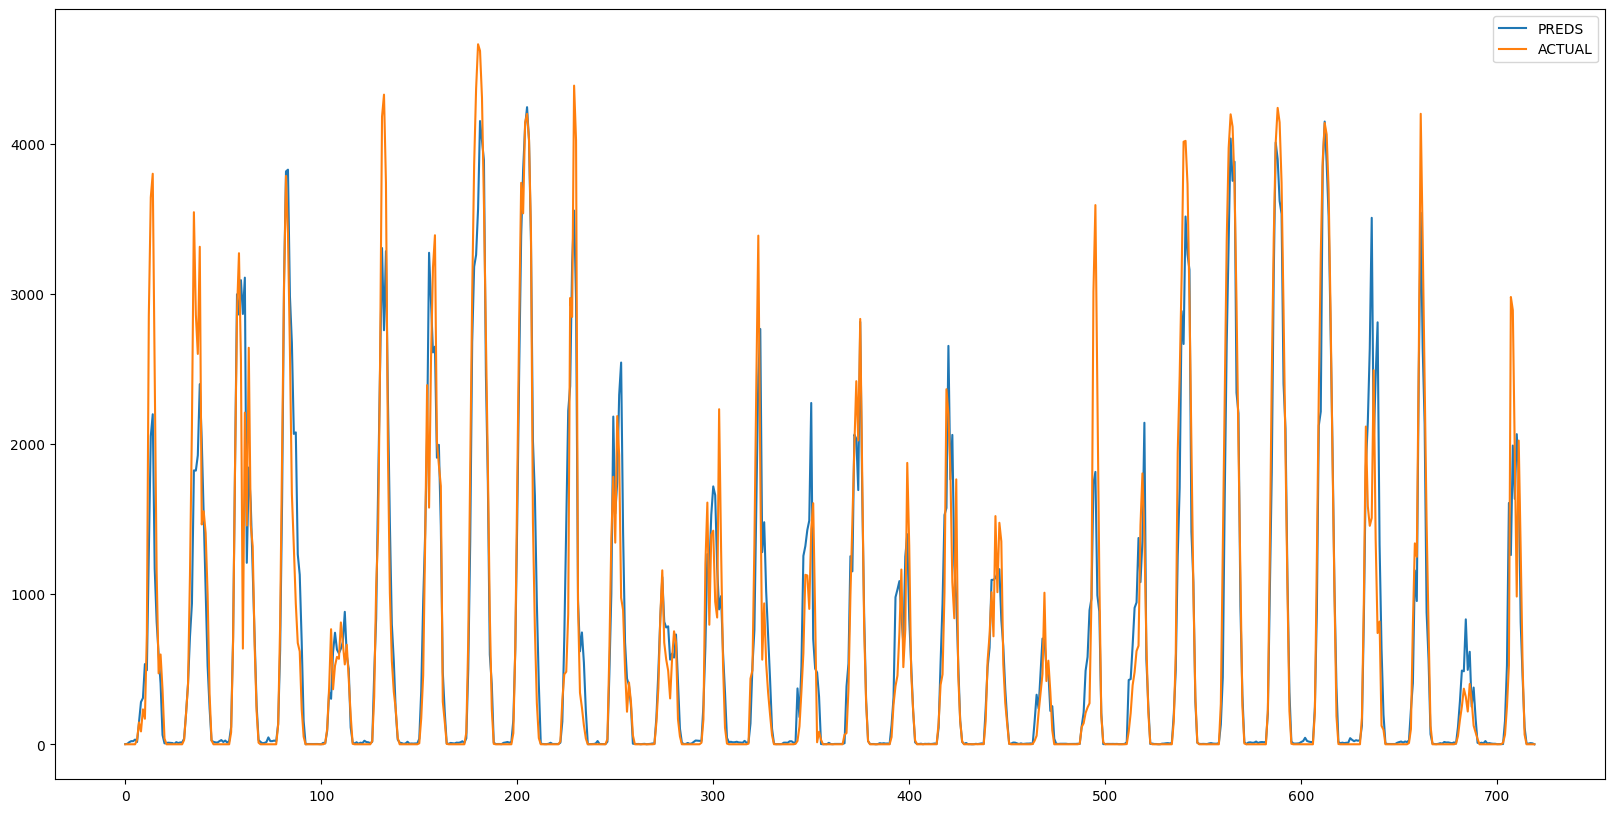

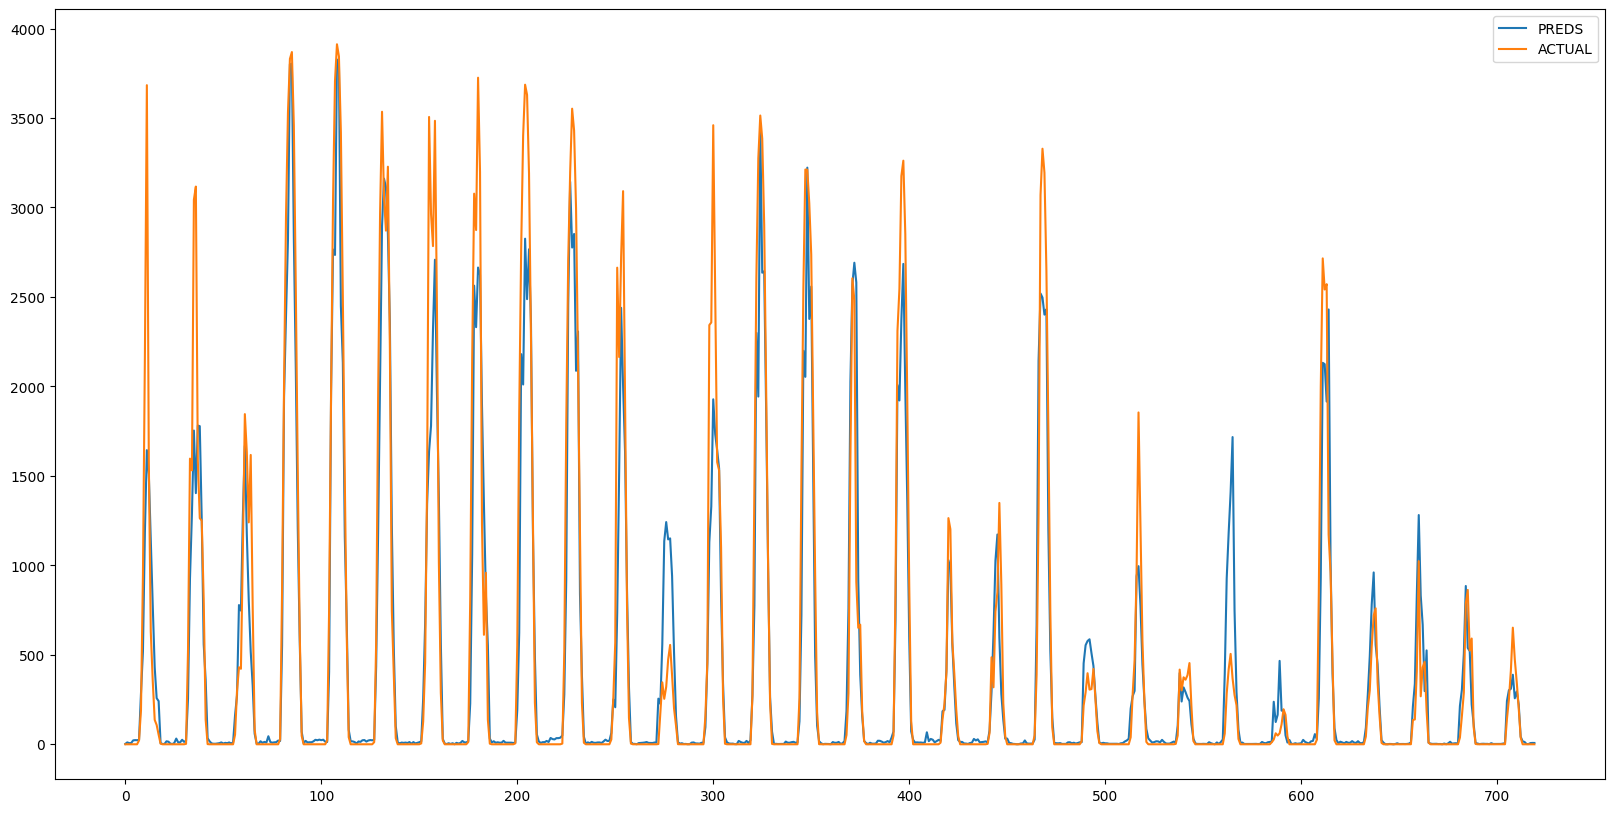

In [100]:
import matplotlib.pyplot as plt

x = np.arange(0, 720, 1)

for i in range(0, 5): 

    y_mid_preds = reg.predict(X.iloc[i*720:(i+1)*720])

    y_mid_actual = y.iloc[i*720:(i+1)*720]

    fig, axs = plt.subplots(1, 1, figsize=(20, 10))
    plt.plot(x, y_mid_preds, label="PREDS")
    plt.plot(x, y_mid_actual, label="ACTUAL")
    plt.legend()
    plt.show()




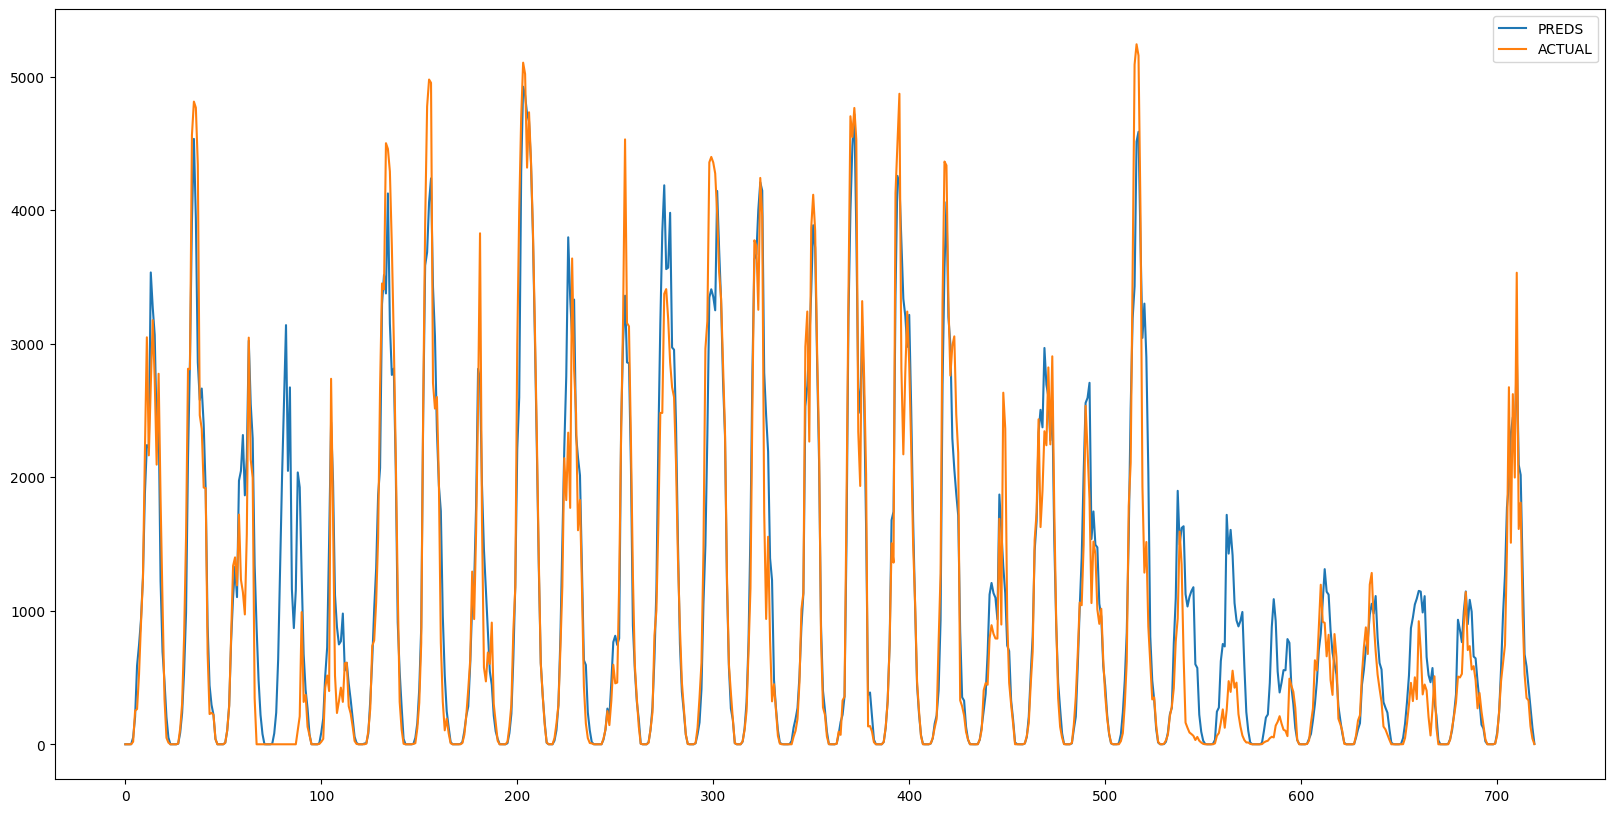

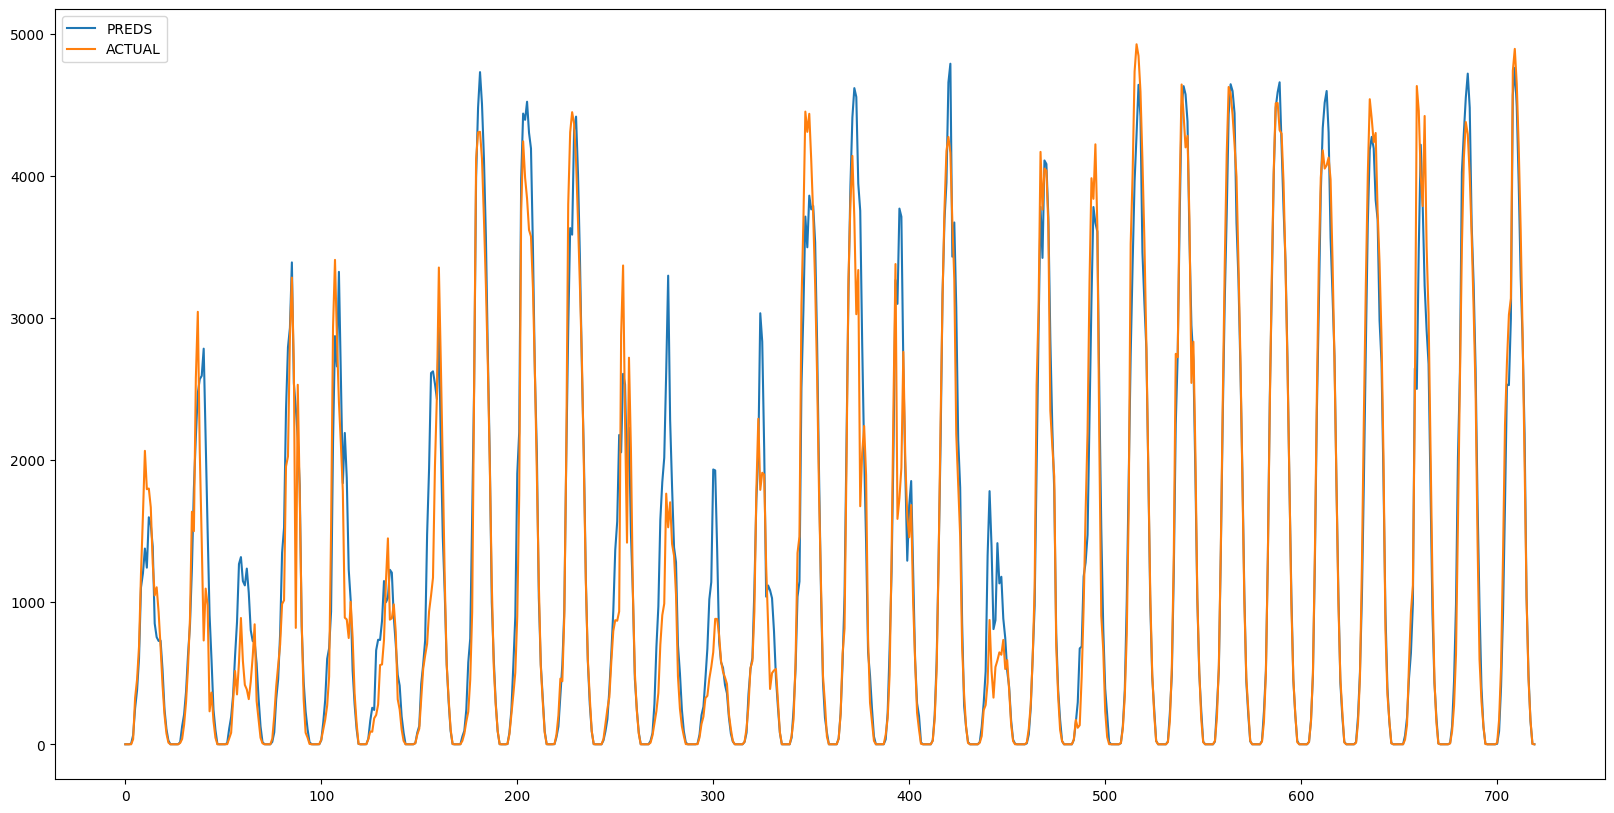

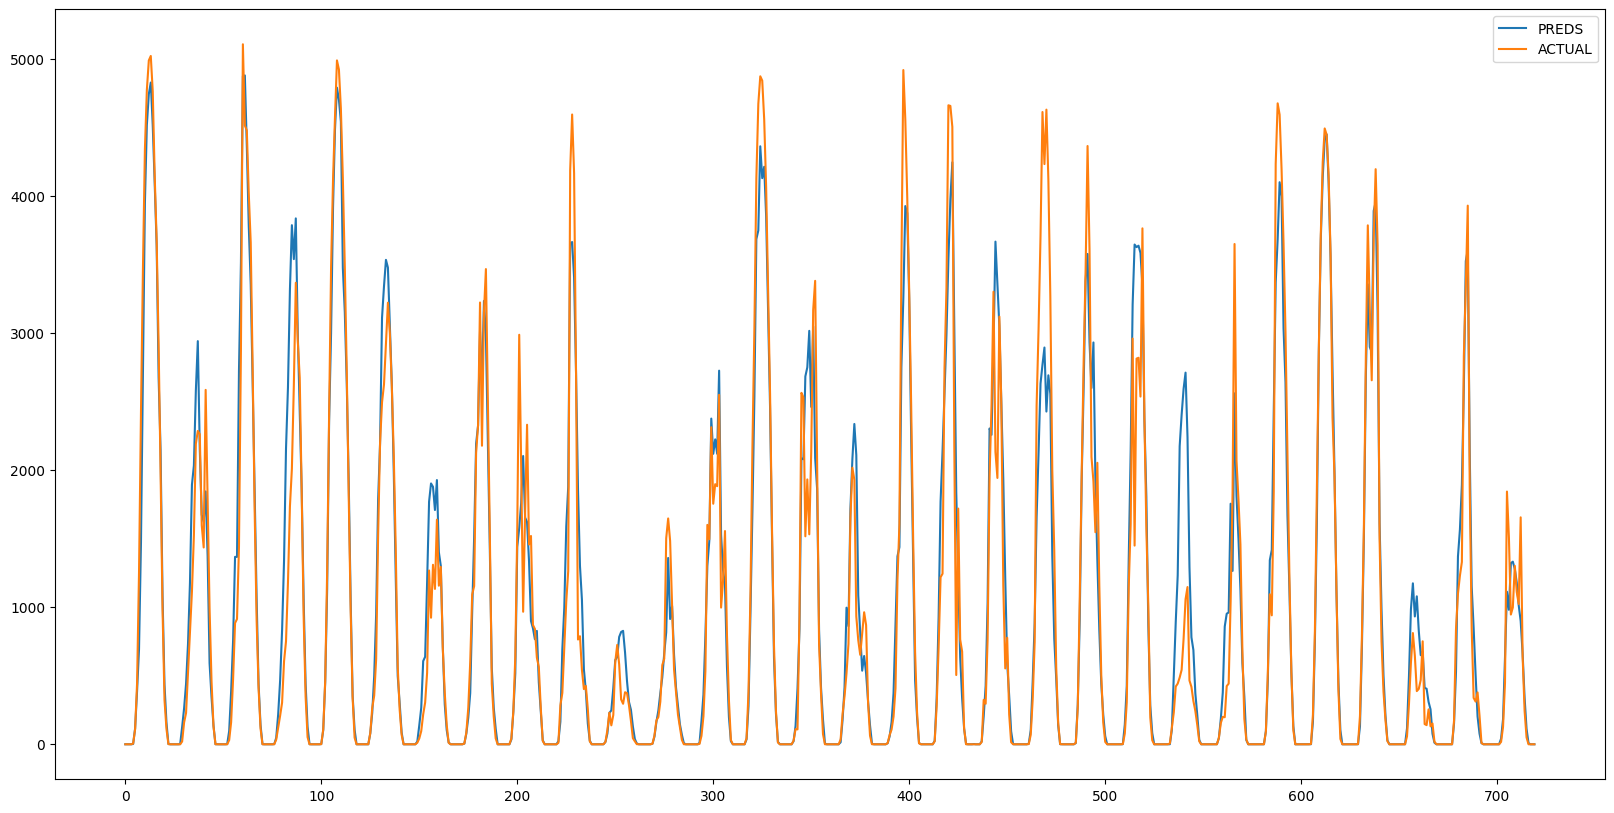

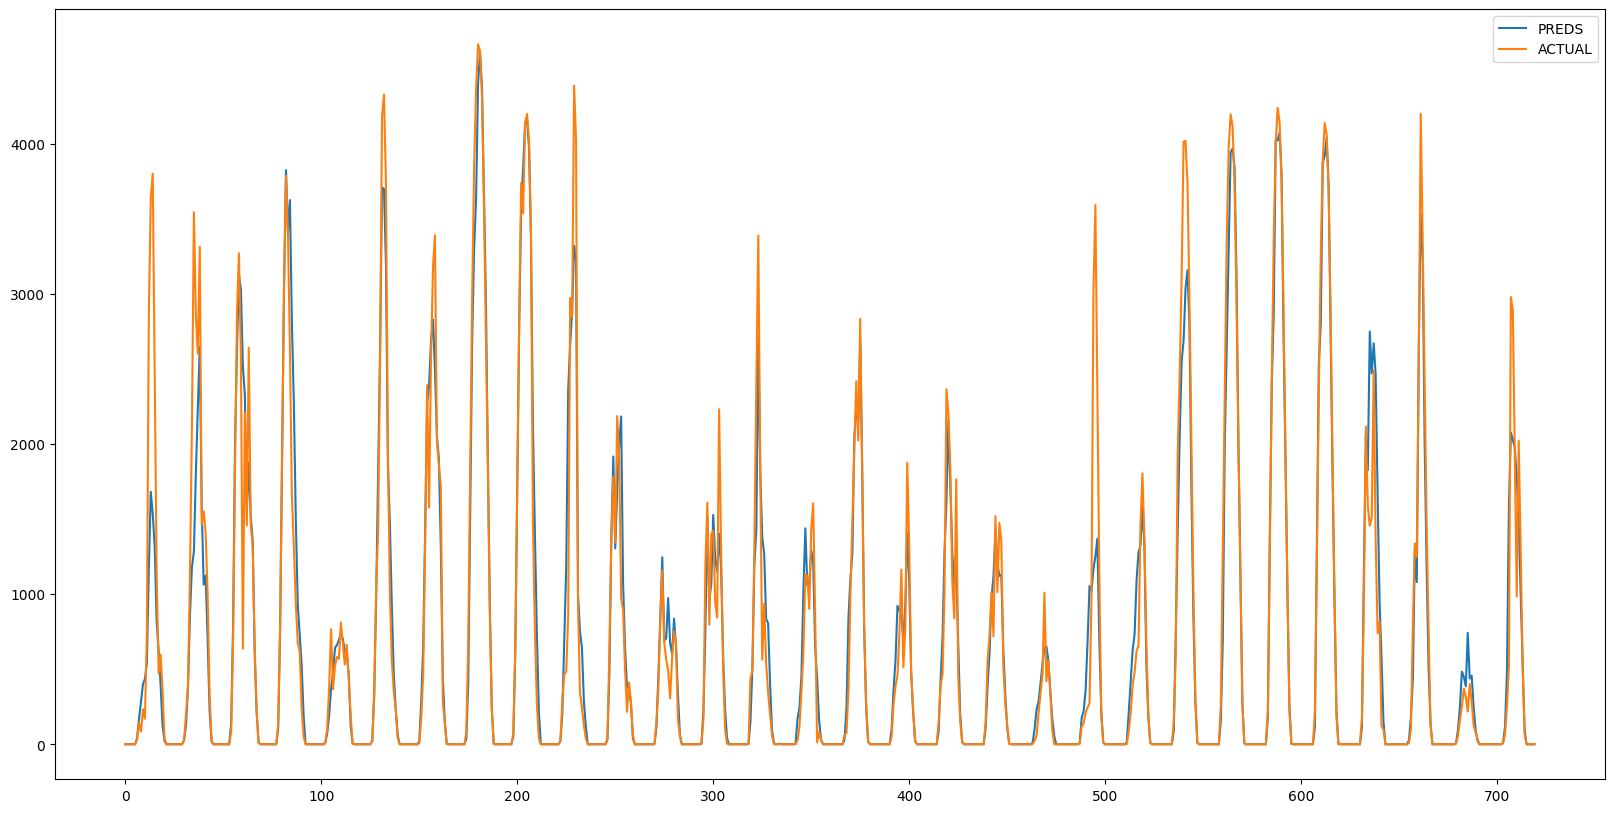

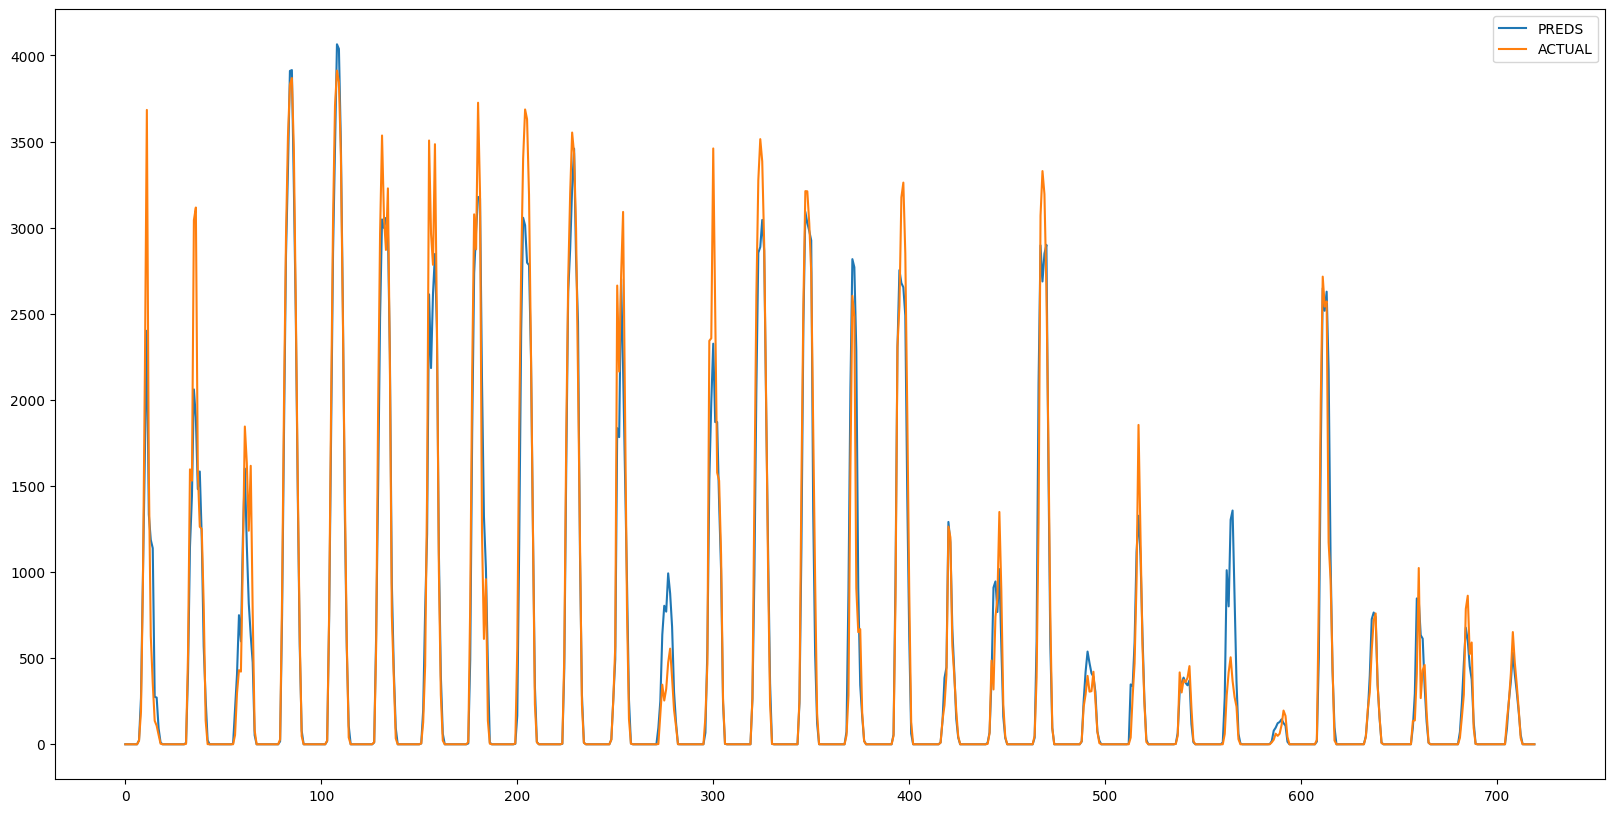

In [107]:
import matplotlib.pyplot as plt

x = np.arange(0, 720, 1)

for i in range(0, 5): 

    y_mid_preds = reg.predict(X.iloc[i*720:(i+1)*720])

    y_mid_actual = y.iloc[i*720:(i+1)*720]

    fig, axs = plt.subplots(1, 1, figsize=(20, 10))
    plt.plot(x, y_mid_preds, label="PREDS")
    plt.plot(x, y_mid_actual, label="ACTUAL")
    plt.legend()
    plt.show()
